In [1]:
### A Pluto.jl notebook ###
# v0.19.24
using Pkg 
#Pkg.add("PyPlot")

In [ ]:

using Markdown
using InteractiveUtils
using XLSX,DataFrames,CSV
using StatsBase,Plots, Statistics,Gtk,FreqTables
using DataFramesMeta
using Query
#using StatsPlots

In [3]:
#Pkg.add("StatsBase")
#Pkg.add("Plots")
#Pkg.add("Gtk")
#Pkg.add("FreqTables")

Ejemplo 
Tomando como datos una base de datos en Excel de Biopsias realizadas

In [4]:
archivo_xlsx=open_dialog("Gestor de Archivos")

"/media/linor/2T_1/CienciadeDatos/Biopsias/Biopsias/bio.xlsx"

In [5]:
#fichero_xlsx="/media/linor/2T_1/CienciadeDatos/curso_julia/biopsias/bio.xlsx"
#fichero_xlsx=open_dialog("Gestor de Archivos")

In [6]:
hoja_de_calculo = XLSX.readtable(archivo_xlsx,"registro")

XLSX.DataTable(Any[Any[2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  16193, 16194, 16195, 16196, 16197, 16198, 16199, 16200, 16201, 16202], Any[58, 53, 27, 80, 40, 23, 24, 47, 50, 58  …  26, 74, 74, 55, 65, 60, 86, 55, 96, 84], Any["F", "F", "F", "F", "F", "F", "M", "F", "F", "F"  …  "F", "F", "F", "F", "F", "F", "M", "F", "M", "F"], Any["M", "B", "B", "B", "M", "B", "N", "B", "B", "B"  …  "N", "B", "B", "B", "B", "B", "B", "B", "B", "B"], Any[4, 4, 1, 1, 4, 4, 1, 1, 1, 1  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], Any[181776, 98295, 2099, 143217, 181776, 181719, 143221, 12126, 143217, 12126  …  65028, 65885, 65885, 54563, 65885, 94755, 92696, 92696, 92696, 79810], Any["Colectomia Izquierda y derecha de ovarios", "  Colectomia ", "  Descartar lesion intrapiterial de alto grado", "carepi ", "Miomas uterinos", "  Embarazo ectopico izkierdo", "  Papiloma paladar duro    ", "descartar VAING", "Cancinoma epidermoide  Carcinoma basal", "  Descartar LIEAG"  …  "  PAPILOMA", "  CARCINOMA BASAL ", "  CARCINOMA BAS

In [7]:
df=DataFrame(hoja_de_calculo)

Row,IdBuiopsia,Edad,Sexo,Raza,IdTipoBiopsia,IdMedico,DiagnosticoMedico,IdEspecialidad,DescripcionBiopsia
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,2,58,F,M,4,181776,Colectomia Izquierda y derecha de ovarios,803,"ROTULADO COMO QUISTE DE OVARIO IZQUIERDO Y CUÑA DE OVARIO DERECGO 2 PIEZAS EN 1 MISMO FRASCO , LA MAYOR CORRESPONDE A TROMPA Y OVARIO IZQUIERDO QUE MIDE 3*1 CM , SEROSA PARDA CLARA , LISA Y BRILLANTE , AL CORTE PAREDES DELGADAS , LUZ POCO VISIBLE OVARIO"
2,3,53,F,B,4,98295,Colectomia,201,"Vesicula biliar de 10 x 4 x 3 cm, serosa verde oscura lisa y brillante a su apertura peredes delgada luz ocupada por varias formaciones blanquesinas irregulares de 1 cm de aspecto litíasico ,mucosa que conserva su aspecto afelpado. 3/1 c/r"
3,4,27,F,B,1,2099,Descartar lesion intrapiterial de alto grado,803,3 PONCHES DE TEJIDO PARDO CLARO DE O.5CM 3 EN 1 SIN RESTO
4,5,80,F,B,1,143217,carepi,211,"FRAGMENTO DE TEJIDO ,BLANCO IRREGULAR DE 5*2 CM QUE EN LA SUPERFICIE PRESENTA FORMACION BLANCA DE ASPECTO VERRUGOSO QUE IMPRESIONAN COINCIDIR CON UNO DE LOS BSQ, AL CORTE BLANCO CON AREAS PARDO OSCURAS"
5,6,40,F,M,4,181776,Miomas uterinos,803,UTERO DE 19X14X10CM SEROSA PARDA CLARA IRREGULAR MULTINODULAR CON VARIAS FORMACIONES EN SU SUPERFICIE LA MAYOR DE 6X5CM CON EXOCERVIX BLANCO ANACARADO OCE RASGADO CANAL PERMIABLE AL CORTES PAREDES FIBROSAS A LOS CORTES DE CUERPO YFONDO CEC MIOMETRIO TRAV
6,7,23,F,B,4,181719,Embarazo ectopico izkierdo,803,"Rotulado como salpingectomía bilateral no así en la boleta Se reciive trompa de 4 x 2 cm con serosa parda clara lisa y brillante dislacerada al corte paredes delgada , luz dilatada en su tercio medio, con contenido pardo oscuro de aspecto hemático 2"
7,8,24,M,N,1,143221,Papiloma paladar duro,211,"Fragmento de tejido blanquesino de 0.5 cm que en la superficie presenta formación oboide blanca , elevada de 0.4 cm especimen que se destina integro a proceso ténico 1/1 s/r"
8,9,47,F,B,1,12126,descartar VAING,803,3 ponches de tejido blanquesino de 0.5 cm 3/1 s/r
9,10,50,F,B,1,143217,Cancinoma epidermoide Carcinoma basal,211,SE RESIVE PIEL REDONDEADA DE4*3CM HACIA SU CENTRO FORMACION ULCERADA DE0.8CM BLANCA GRISACEA AL CORTE BLANQUESINO


In [8]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,IdBuiopsia,9317.38,2,9321.0,18625,0,Any
2,Edad,51.9306,1,53.0,100,0,Any
3,Sexo,,F,,M,0,Any
4,Raza,,A,,N,0,Any
5,IdTipoBiopsia,2.95837,1,4.0,5,0,Any
6,IdMedico,8.24729e5,1493,92696.0,21003492,0,Any
7,DiagnosticoMedico,,,,vitiligo,31,Any
8,IdEspecialidad,354.802,101,203.0,2003,0,Any
9,DescripcionBiopsia,,,,"ÚTERO DE 4 X 2 X 3 , SEROSA PARDO CLARA LISA, BRILLANTE, EXOCERVIS BLANCO , MACERADO OCE ROSADO, CANAL PERMEABLE , A LOS CORTES PARDES FIBROSAS , CANAL DE 1 CM A LOS CORTES SERIADOS DE CUERPO Y FONDO DE CAVIDAD ENDOMETRIAL , ENDOMETRIO CENTRAL, MIOMETRIO T",1,Any


In [9]:
md"## Para cambiar el nombre de las columnas"

## Para cambiar el nombre de las columnas


In [10]:
md" Se usa el comando rename(DataFrame, :NombreViejo=>:NombreNuevo, ....)"

Se usa el comando rename(DataFrame, :NombreViejo=>:NombreNuevo, ....)


In [11]:
df_otro=rename(df,:Raza=>:ColordePiel,:IdTipoBiopsia=>:TipoBiopsia,:IdEspecialidad=>:Especialidad,:IdMedico=>:Medico);

In [12]:
describe(df_otro)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,IdBuiopsia,9317.38,2,9321.0,18625,0,Any
2,Edad,51.9306,1,53.0,100,0,Any
3,Sexo,,F,,M,0,Any
4,ColordePiel,,A,,N,0,Any
5,TipoBiopsia,2.95837,1,4.0,5,0,Any
6,Medico,8.24729e5,1493,92696.0,21003492,0,Any
7,DiagnosticoMedico,,,,vitiligo,31,Any
8,Especialidad,354.802,101,203.0,2003,0,Any
9,DescripcionBiopsia,,,,"ÚTERO DE 4 X 2 X 3 , SEROSA PARDO CLARA LISA, BRILLANTE, EXOCERVIS BLANCO , MACERADO OCE ROSADO, CANAL PERMEABLE , A LOS CORTES PARDES FIBROSAS , CANAL DE 1 CM A LOS CORTES SERIADOS DE CUERPO Y FONDO DE CAVIDAD ENDOMETRIAL , ENDOMETRIO CENTRAL, MIOMETRIO T",1,Any


In [13]:
#edades=df.Edad

In [14]:
#media_edades=mean(df_otro.Edad)

In [15]:
#mediana_edades = median(df_otro.Edad)

In [16]:
moda_edades=mode(df_otro.Edad)

56

In [17]:
intervalos_edad = 0:10:100

0:10:100

In [18]:
frecuencia_biopsias = fit(Histogram, df_otro.Edad, intervalos_edad)

Histogram{Int64, 1, Tuple{StepRange{Int64, Int64}}}
edges:
  0:10:100
weights: [3, 618, 2106, 2424, 2801, 4037, 2931, 2448, 1042, 156]
closed: left
isdensity: false

In [19]:
resultadosSexoEdad = combine(groupby(df_otro, :Sexo), :Edad => mean)

Row,Sexo,Edad_mean
,Any,Float64
1,F,48.6926
2,M,57.9513


In [20]:
println(resultadosSexoEdad)

2×2 DataFrame
 Row │ Sexo  Edad_mean 
     │ Any   Float64   
─────┼─────────────────
   1 │ F       48.6926
   2 │ M       57.9513


In [21]:
resultadosRazaEdad = combine(groupby(df_otro, :ColordePiel), :Edad => mean)

Row,ColordePiel,Edad_mean
,Any,Float64
1,M,45.564
2,B,52.652
3,N,50.0849
4,A,45.7812


In [22]:
describe(df_otro)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,IdBuiopsia,9317.38,2,9321.0,18625,0,Any
2,Edad,51.9306,1,53.0,100,0,Any
3,Sexo,,F,,M,0,Any
4,ColordePiel,,A,,N,0,Any
5,TipoBiopsia,2.95837,1,4.0,5,0,Any
6,Medico,8.24729e5,1493,92696.0,21003492,0,Any
7,DiagnosticoMedico,,,,vitiligo,31,Any
8,Especialidad,354.802,101,203.0,2003,0,Any
9,DescripcionBiopsia,,,,"ÚTERO DE 4 X 2 X 3 , SEROSA PARDO CLARA LISA, BRILLANTE, EXOCERVIS BLANCO , MACERADO OCE ROSADO, CANAL PERMEABLE , A LOS CORTES PARDES FIBROSAS , CANAL DE 1 CM A LOS CORTES SERIADOS DE CUERPO Y FONDO DE CAVIDAD ENDOMETRIAL , ENDOMETRIO CENTRAL, MIOMETRIO T",1,Any


In [23]:
println(resultadosRazaEdad)

4×2 DataFrame
 Row │ ColordePiel  Edad_mean 
     │ Any          Float64   
─────┼────────────────────────
   1 │ M              45.564
   2 │ B              52.652
   3 │ N              50.0849
   4 │ A              45.7812


In [24]:
#ruta = "/ruta/al/archivo/datos.xlsx"
#hoja_de_calculo = XLSX.readtable(ruta, "nombre_de_la_hoja") # "nombre_de_la_hoja" es #el nombre de la hoja de cálculo
#df = DataFrame(hoja_de_calculo)



In [25]:
#ruta = "/ruta/al/archivo/datos.xlsx"
#hoja_de_calculo = XLSX.readtable(ruta, "nombre_de_la_hoja") # "nombre_de_la_hoja" es el nombre de la hoja de cálculo
#df = convert(DataFrame, hoja_de_calculo)

In [26]:
#histogram(edades, bins = intervalos_edad, xlabel = "Edad", ylabel = "Frecuencia", #title = "Frecuencia de biopsias por edad")

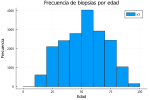

In [27]:
grafico=histogram(df_otro.Edad, bins = intervalos_edad, xlabel = "Edad", ylabel = "Frecuencia",title = "Frecuencia de biopsias por edad") 
display(grafico)

In [28]:
dic_bio = Dict(1=>"Puncion",2=>"Escision",3=>"Raspado",4=>"Incision",5=>"BAAF",6=>"ALGUNA")

Dict{Int64, String} with 6 entries:
  5 => "BAAF"
  4 => "Incision"
  6 => "ALGUNA"
  2 => "Escision"
  3 => "Raspado"
  1 => "Puncion"

In [29]:
dic_piel = Dict("A"=>"Amarilla","B"=>"Blanca","N"=>"Negra","M"=>"Mestiza")
#Falta el diccionario de Medico y Especialidad

Dict{String, String} with 4 entries:
  "B" => "Blanca"
  "A" => "Amarilla"
  "M" => "Mestiza"
  "N" => "Negra"

In [30]:
df_corto=select(df_otro,"Edad","Sexo","ColordePiel","TipoBiopsia","Medico","Especialidad")

Row,Edad,Sexo,ColordePiel,TipoBiopsia,Medico,Especialidad
,Any,Any,Any,Any,Any,Any
1,58,F,M,4,181776,803
2,53,F,B,4,98295,201
3,27,F,B,1,2099,803
4,80,F,B,1,143217,211
5,40,F,M,4,181776,803
6,23,F,B,4,181719,803
7,24,M,N,1,143221,211
8,47,F,B,1,12126,803
9,50,F,B,1,143217,211


In [31]:
describe(df_corto)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Edad,51.9306,1,53.0,100,0,Any
2,Sexo,,F,,M,0,Any
3,ColordePiel,,A,,N,0,Any
4,TipoBiopsia,2.95837,1,4.0,5,0,Any
5,Medico,8.24729e5,1493,92696.0,21003492,0,Any
6,Especialidad,354.802,101,203.0,2003,0,Any


In [32]:
std_dev_Edad = std(df_otro[:, :Edad])

18.455813647708553

In [33]:
##begin
	# Datos de ejemplo
	#empleados = [10, 20, 30, 40, 50, 60, 70, 80]
	#beneficios = [10000, 20000, 30000, 35000, 50000, 60000, 70000, 80000]
	# Gráfico de dispersión
	#scatter(empleados, beneficios, xlabel="Número de empleados", ylabel="Beneficios", label="Empresas")
	# Agregar línea de referencia
	#hline!([18000], color=:red, label="Límite de beneficios")
	# Mostrar el gráfico
	#display(plot!())
#end	
	


In [34]:
map!(x -> dic_bio[x], df_corto.TipoBiopsia, df_corto.TipoBiopsia);
map!(y-> dic_piel[y], df_corto.ColordePiel,df_corto.ColordePiel);
#df_nuevo=transform(df_corto, :TipoBiopsia=>x->get(dic_bio,x,"No válido")=>:TipoBiopsia)

In [35]:
df_corto

Row,Edad,Sexo,ColordePiel,TipoBiopsia,Medico,Especialidad
,Any,Any,Any,Any,Any,Any
1,58,F,Mestiza,Incision,181776,803
2,53,F,Blanca,Incision,98295,201
3,27,F,Blanca,Puncion,2099,803
4,80,F,Blanca,Puncion,143217,211
5,40,F,Mestiza,Incision,181776,803
6,23,F,Blanca,Incision,181719,803
7,24,M,Negra,Puncion,143221,211
8,47,F,Blanca,Puncion,12126,803
9,50,F,Blanca,Puncion,143217,211


In [36]:
#resultadosTipoBiopsiaEdad = combine(groupby(df_corto, :TipoBiopsia), :Edad => mean)
#graficoBiopsiaEdad=histogram(resultadosTipoBiopsiaEdad, bins = intervalos_edad, xlabel = "TipoBiopsia", ylabel = "Edad",title = "Edad Promedio de biopsias") 
#display(graficoBiopsiaEdad)

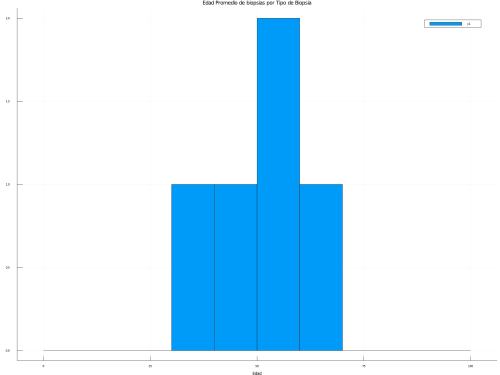

In [37]:
resultadosTipoBiopsiaEdad = combine(groupby(df_corto, :TipoBiopsia), :Edad => mean)
graficoBiopsiaEdad = histogram(resultadosTipoBiopsiaEdad.Edad_mean, bins = intervalos_edad, xlabel = "Edad", ylabel = "Frecuencia", title = "Edad Promedio de biopsias por Tipo de Biopsia",size=(2000,1500))
display(graficoBiopsiaEdad)

In [38]:
Tf_TipoBiopsia = freqtable(df_corto.TipoBiopsia)

5-element Named Vector{Int64}
Dim1     │ 
─────────┼─────
BAAF     │  895
Escision │  501
Incision │ 9678
Puncion  │ 5870
Raspado  │ 1625

In [39]:
#resultadosTipoBiopsiaEdad = combine(groupby(df_corto, :TipoBiopsia), :TipoBiopsia => count)

In [40]:
Tf_ColordePiel = freqtable(df_corto.ColordePiel)

4-element Named Vector{Int64}
Dim1     │ 
─────────┼──────
Amarilla │    96
Blanca   │ 16000
Mestiza  │  1413
Negra    │  1060

La familia de fuentes actual es Plots.Font("sans-serif", 20, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))


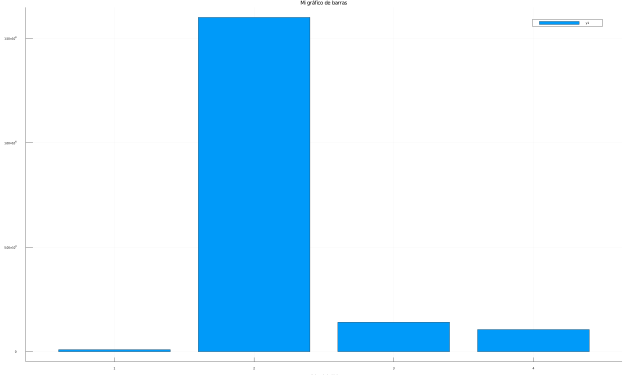

In [60]:
#import RDatasets

font_family = Plots.font(20)
#Plots.font(20)
println("La familia de fuentes actual es $font_family")
#using PyPlot
#Plots.fontfamily!("Liberation Serif")
#Plots.fontsize(14)
bar(Tf_ColordePiel, xlabel="Color de la Piel", ylabel="Frecuencia", title="Mi gráfico de barras",size=(2500,1500))

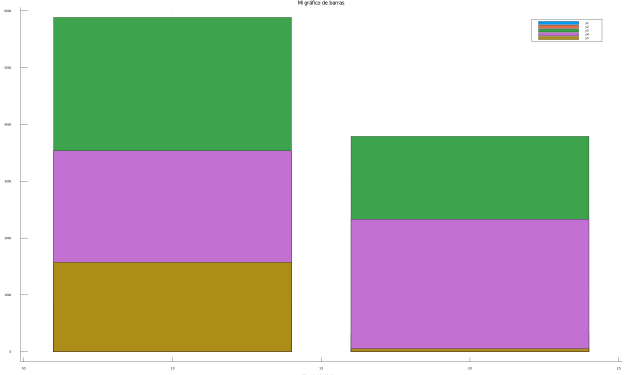

In [49]:
Tf_Sexo_TB=freqtable(df_corto.Sexo, df_corto.TipoBiopsia)
bar(Tf_Sexo_TB, xlabel="Tipo de Biopsia/Sexo", ylabel="Frecuencia", title="Tipo de Biopsia x Edades",size=(2500,1500))

4×5 Named Matrix{Int64}
Dim1 ╲ Dim2 │     BAAF  Escision  Incision   Puncion   Raspado
────────────┼─────────────────────────────────────────────────
Amarilla    │        8         1        48        33         6
Blanca      │      775       424      8269      5192      1340
Mestiza     │       79        39       777       363       155
Negra       │       33        37       584       282       124

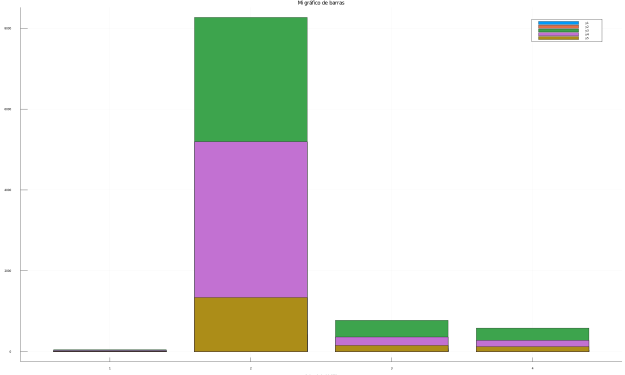

In [51]:
 TF_CP_TB=freqtable(df_corto.ColordePiel, df_corto.TipoBiopsia)
 display(TF_CP_TB)
 bar(TF_CP_TB, xlabel="Color de la Piel/TB", ylabel="Frecuencia", title="Mi gráfico de barras",size=(2500,1500))

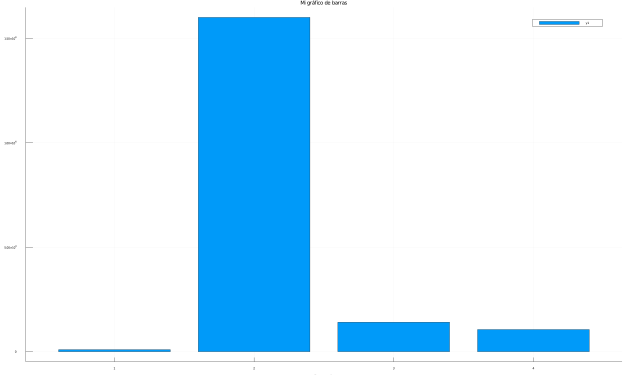

In [65]:
Tf_Sexo_CP=freqtable(df_corto.ColordePiel,df_corto.Sexo )
#display(Tf_Sexo_CP)
##sexo=Tf_Sexo_CP.Sexo
#sexo
#colorpiel=Tf_Sexo_CP.ColordePiel
bar(Tf_ColordePiel, xlabel="Frecuencia", ylabel="Color de la Piel", title="Mi gráfico de barras",size=(2500,1500))
#bar(Tf_Sexo_CP.Sexo,Tf_Sexo_CP.ColordePiel, xlabel="Frecuencia", ylabel="Color de la Piel", title="Mi gráfico de barras",size=(2500,1500))

In [ ]:
using DataFramesMeta
using Query
using StatsPlots

agr = penguins |>
    @groupby(_.species) |>
    @map({species=key(_), conteo=length(_)}) |>
    DataFrame

bar(agr.species, agr.conteo,
    label = "Número de pinguinos",
    title = "Conteo por especie",
    xticks =:all,
    size = [600, 400],
    legend =:topright)

In [45]:
Tf_Sexo_CP=freqtable(df_corto.Edad, df_corto.ColordePiel)

91×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │ Amarilla    Blanca   Mestiza     Negra
────────────┼───────────────────────────────────────
1           │        1         0         0         0
8           │        0         1         0         0
9           │        0         1         0         0
12          │        0         2         1         0
13          │        0         4         1         0
14          │        2         3         1         0
15          │        0        26         2         0
16          │        0        48         4         2
17          │        0        75         6         4
18          │        1       182        30         9
19          │        1       178        25        11
⋮                    ⋮         ⋮         ⋮         ⋮
89          │        0        46         2         2
90          │        0        32         2         3
91          │        0        17         1         2
92          │        0        35         1         0
93          │        

In [46]:
Tf_Sexo_CP=freqtable(df_corto.Edad, df_corto.ColordePiel)


91×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │ Amarilla    Blanca   Mestiza     Negra
────────────┼───────────────────────────────────────
1           │        1         0         0         0
8           │        0         1         0         0
9           │        0         1         0         0
12          │        0         2         1         0
13          │        0         4         1         0
14          │        2         3         1         0
15          │        0        26         2         0
16          │        0        48         4         2
17          │        0        75         6         4
18          │        1       182        30         9
19          │        1       178        25        11
⋮                    ⋮         ⋮         ⋮         ⋮
89          │        0        46         2         2
90          │        0        32         2         3
91          │        0        17         1         2
92          │        0        35         1         0
93          │        

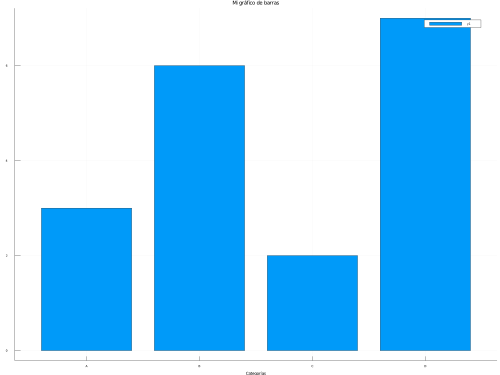

In [61]:
# Creamos los datos de ejemplo
x = ["A", "B", "C", "D"]
y = [3, 6, 2, 7]

# Creamos el gráfico
bar(x, y, xlabel="Categorías", ylabel="Valores", title="Mi gráfico de barras",size=(2000,1500))

In [48]:
Tf_Sexo_CP=freqtable(df_corto.Edad, df_corto.Sexo)

91×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │   F    M
────────────┼─────────
1           │   0    1
8           │   1    0
9           │   0    1
12          │   2    1
13          │   5    0
14          │   6    0
15          │  27    1
16          │  52    2
17          │  75   10
18          │ 152   70
19          │ 125   90
⋮               ⋮    ⋮
89          │  24   26
90          │  20   17
91          │   8   12
92          │  17   19
93          │  14    6
94          │  12    5
95          │   5    5
96          │   1    4
97          │   3    3
98          │   3    2
100         │   2    1

In [66]:

agr=df_corto|>@groupby(_.ColordePiel)|>
                                   @map({ColordePiel=key(_),conteo=length(_)})|>
                                   DataFrame
bar(agr.ColordePiel,agr.conteo,
    label="Cantidad de Biopsias",
    titlr="Biopsias por Color de la Piel".
    xticks=:all,
    size=[600,400],
    legend=:topright)

LoadError: LoadError: UndefVarError: @groupby not defined
in expression starting at In[66]:1